In [1]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.1/864.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 28.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 30.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


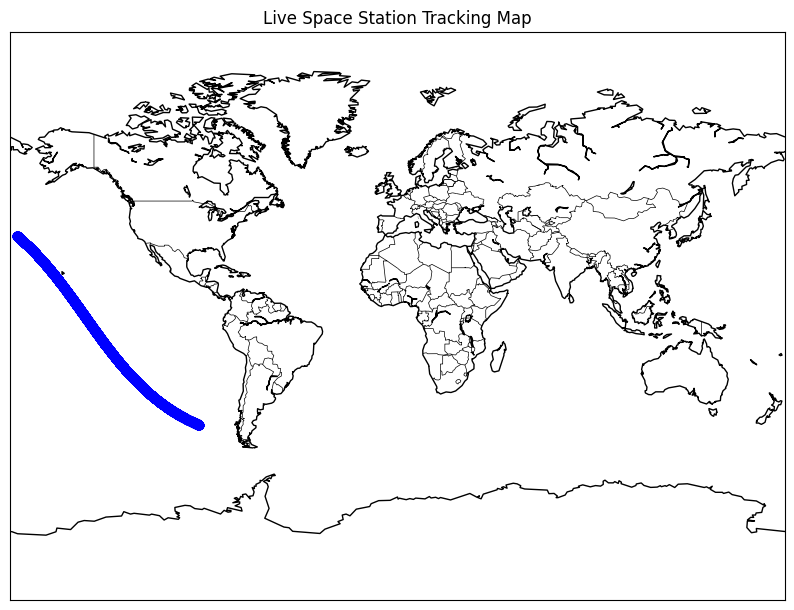

In [2]:
import requests
import json
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import time

# Set up the figure
fig = plt.figure(figsize=(10, 10))
long_list = []
lat_list = []

# Set up the map projection
m = Basemap(projection='mill', lon_0=0)

# Set up the plot title
plt.title('Live Space Station Tracking Map')

# Set the URL for the API
url = 'http://api.open-notify.org/iss-now.json'

# Set the start time for the data streaming
start_time = time.time()

# Stream data for one hour
while time.time() - start_time < 1800:
    # Fetch data from the API
    response = requests.get(url).json()

    # Get the longitude of the ISS
    long = float(response['iss_position']['longitude'])
     # Get the latitude of the ISS 
    lat = float(response['iss_position']['latitude'])
    long_list.append(long)
    lat_list.append(lat)

x, y = m(long_list, lat_list)    
m.plot(x, y, 'bo', markersize=6)

# Draw the coastlines and the countries
m.drawcoastlines()
m.drawcountries()

# Save the plot as an image file
plt.savefig('iss_location.png')
plt.pause(0.001)
time.sleep(5)